In [59]:
library(ggplot2)

I am reading in the data from the provided file.

In [60]:
setwd("~/Desktop/")
data = read.csv("2020XTern.csv")
data

Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
ID_6321,39.26261,-85.83737,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
ID_2882,39.77593,-85.74058,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
ID_1595,39.25344,-85.12378,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
ID_5929,39.02984,-85.33205,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
ID_6123,39.88228,-85.51741,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes
ID_5221,39.37044,-85.73952,"South Indian, North Indian, Chinese",$15.00,$50.00,3.8,46,18,30 minutes
ID_3777,39.82181,-85.00558,"Beverages, Fast Food",$15.00,$50.00,3.7,108,31,30 minutes
ID_745,39.28032,-85.14436,"Chinese, Thai, Asian",$65.00,$50.00,4.0,1731,1235,45 minutes
ID_2970,39.26882,-85.60217,"Mithai, Street Food",$10.00,$50.00,3.9,110,26,30 minutes
ID_3474,39.87452,-85.43996,"Fast Food, North Indian, Rolls, Chinese, Momos, Mughlai",$20.00,$50.00,3.9,562,294,65 minutes


The first thing I want to find is what are the trendiest resturaunts in the Area.<br>
I classify these as having both a lot of votes and a high rating.

In [61]:
# Trendy = lots of votes/ high reviews

data$Rating = as.numeric(as.character(data$Rating))
data$Votes = as.numeric(as.character(data$Votes))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

I first clean up the data a bit. The columns Rating and Votes are characters and I need to change them to numerical values to do some operations on them

In [62]:
meanRat=mean(na.omit(data$Rating))
sdRat = sd(na.omit(data$Rating))
meanVot = mean(na.omit(data$Votes))
sdVot = sd(na.omit(data$Votes))

In [63]:
data['RatingScore'] = ((data['Rating'] - meanRat) / sdRat)
data['VotesScore'] = ((data['Votes'] - meanVot) / sdVot) 

Here I am giving each restaurant a rating score and a votes score. These scores are calculated by finding the standarized value of each restaurants Rating and Votes value.

In [65]:
d = data[!is.na(data$Rating) & !is.na(data$Votes) ,]
d

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,RatingScore,VotesScore
1,ID_6321,39.26261,-85.83737,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes,-0.25873625,-0.43227787
2,ID_2882,39.77593,-85.74058,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes,-0.25873625,-0.43405826
3,ID_1595,39.25344,-85.12378,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes,-0.02202313,-0.27738376
4,ID_5929,39.02984,-85.33205,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes,0.21468999,-0.14029358
5,ID_6123,39.88228,-85.51741,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes,-0.96887560,0.47394164
6,ID_5221,39.37044,-85.73952,"South Indian, North Indian, Chinese",$15.00,$50.00,3.8,46,18,30 minutes,0.45140311,-0.37174454
7,ID_3777,39.82181,-85.00558,"Beverages, Fast Food",$15.00,$50.00,3.7,108,31,30 minutes,0.21468999,-0.26136024
8,ID_745,39.28032,-85.14436,"Chinese, Thai, Asian",$65.00,$50.00,4.0,1731,1235,45 minutes,0.92482934,2.62821592
9,ID_2970,39.26882,-85.60217,"Mithai, Street Food",$10.00,$50.00,3.9,110,26,30 minutes,0.68811623,-0.25779945
10,ID_3474,39.87452,-85.43996,"Fast Food, North Indian, Rolls, Chinese, Momos, Mughlai",$20.00,$50.00,3.9,562,294,65 minutes,0.68811623,0.54693772


In [66]:
r=d[(d$RatingScore > quantile(d$RatingScore,prob=1-5/100)) & (d$VotesScore > quantile(d$VotesScore,prob=1-5/100)),]
print(r)

     Restaurant Latitude Longitude
198     ID_2041 39.16901 -85.23024
214     ID_7158 39.20009 -85.57601
487     ID_7678 39.97856 -85.28523
603     ID_8529 39.35606 -85.01149
702      ID_635 39.74808 -85.73557
738     ID_1877 39.12924 -85.72775
760     ID_6915 39.30380 -85.96014
974     ID_2421 39.35123 -85.01265
1059    ID_1841 39.91432 -85.07494
1181    ID_1064 39.58778 -85.56481
1262     ID_635 39.44685 -85.02729
1301    ID_1666 39.95998 -85.90333
1429    ID_2051 39.75989 -85.50051
1463    ID_7739 39.83248 -85.89925
1502    ID_7924 39.54138 -85.58898
                                                                      Cuisines
198  Italian, Pizza, Salad, Healthy Food, Mexican, Cafe, Desserts, Continental
214                                  Ice Cream, Cafe, Pizza, Burger, Beverages
487                                           Asian, Continental, North Indian
603                                                            Cafe, Fast Food
702                                          

Now I am finding the trendiest restaurants. To do this I found the restaurants whose rating score is in the 95th percentile same for the ovoting score.
This left me with the 15 trendiest restaurants in the area. 
You can find them by looking at the Id_values in the print out above.

Next I wanted to find the best value in town. To do this I divided each restaurant's Average_Cost by its Rating. This gave each restaurant a value score. The restaurant with the lowest score is the best value because essentially the value score is cost per rating point.

In [68]:
d$Average_Cost = sub('.', '', d$Average_Cost)
d$Average_Cost= as.numeric(as.character(d$Average_Cost))

d$ResVal = d['Average_Cost']/ d[,'Rating']

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [75]:
d = transform(d,  RestVal= Average_Cost / Rating)
m = min(na.omit(d$RestVal))
a = d[d$RestVal == m, ]
print(a$Restaurant)
print(a$ResVal)


[1] ID_635 <NA>   ID_635 <NA>  
1807 Levels: ID_1000 ID_1004 ID_1005 ID_1007 ID_1013 ID_1015 ID_1016 ... ID_996
     Average_Cost
702      1.136364
NA             NA
1262     1.136364
NA.1           NA


The best value in town is the restaurant with ID_635. They had a value score of 1.136364

Next I wanted to see what the most profitable and costliest areas would be for both the consumer and the workers.
To do this I plotted a chart showing location given by latitude and longitude and their color represents each restaurant's Average_Cost.


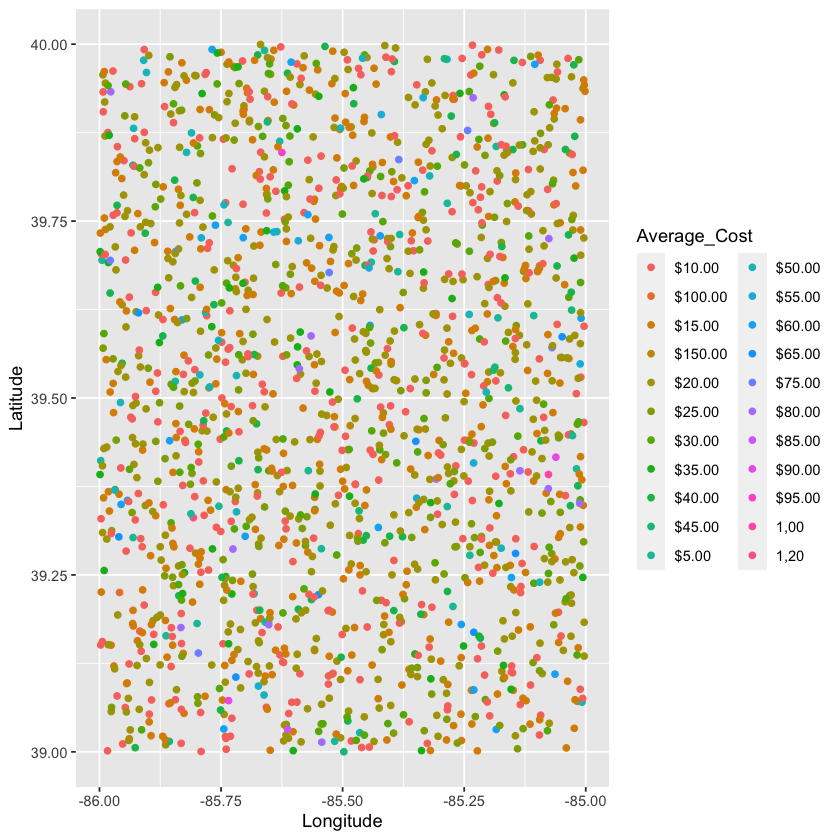

In [67]:
ggplot(d, aes(x=Longitude, y= Latitude, color = Average_Cost)) + geom_point()

This plot is helpful in showing the dispertion of costs across the city but it is still difficult to see what the average price is for each region.
To find these regions I split the data into 4 clusters based off of location.
North West, North East, South East, and South West.

Then I calculated each regions Average_Cost as well as Its average Minimum_Order.

In [70]:
d$Minimum_Order = sub('.', '', d$Minimum_Order)
d$Minimum_Order= as.numeric(as.character(d$Minimum_Order))

In [71]:
NW = d[(d$Latitude> quantile(d$Latitude,prob=1-50/100)) & (d$Longitude < quantile(d$Longitude,prob=1-50/100)),]
NE =  d[(d$Latitude> quantile(d$Latitude,prob=1-50/100)) & (d$Longitude > quantile(d$Longitude,prob=1-50/100)),]
SE = d[(d$Latitude< quantile(d$Latitude,prob=1-50/100)) & (d$Longitude >quantile(d$Longitude,prob=1-50/100)),]
SW = d[(d$Latitude< quantile(d$Latitude,prob=1-50/100)) & (d$Longitude < quantile(d$Longitude,prob=1-50/100)),]

In [72]:
mean(na.omit(NW$Average_Cost))
mean(na.omit(NE$Average_Cost))
mean(na.omit(SE$Average_Cost))
mean(na.omit(SW$Average_Cost))

[1] 21.9625

[1] 20.84928

[1] 21.5625

[1] 20.53957

We can see that the cheapest ares of town is the SW quandrant, and the most expensive is the NW quadrant. This is good to know because if cutomers are looking for a deal they should travel to the SW part of the city

In [73]:

mean(na.omit(NW$Minimum_Order))
mean(na.omit(NE$Minimum_Order))
mean(na.omit(SE$Minimum_Order))
mean(na.omit(SW$Minimum_Order))

[1] 54.16

[1] 53.64115

[1] 54.78554

[1] 53.82536

We can see that the most profitable area of town is the SE quandrant, and the least profitable is the NE quadrant. This is good to know because If you and or your drivers want to make money its good to know that the SE quadrant of the city will provide the most profit due to its higher average minimum order.

In summary the four conclusions that I made were I found the 15 trendiest restaurants in the city. I found the restaurant with the the best value in terms of cost. Finally I found the cheapest area in the city for consumers as well as the most profitable area in the city for the company and its employees.